<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Machine_Leanring_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Machine Learning Final Project**

First we are going to mount google drive to our code to be able to have our dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [259]:
# Import my file
csv_file_path = '/content/drive/MyDrive/Machine Learning Project/Base_Camila_1.csv'
# Read the CSV file into a DataFrame
Covid = pd.read_csv(csv_file_path, delimiter=';')

In [260]:
len(Covid)

1308

In [261]:
Covid

,record_id,medical_record,age,intubation,icu_care,saps3,sao2_admission,icu_los_2,estado_geral,sex,systolic_bp_admission,diastolic_bp_admission,death,estado_geral_c
0,18,2467406F,64.4,sim,sim,72,92,30,MEG,feminino,120,60,nao,3
1,150,14267766G,59.1,sim,sim,56,94,17,REG,feminino,102,66,sim,2
2,662,91764640E,50.7,sim,sim,61,88,15,MEG,masculino,120,52,nao,3
3,3765,2905968J,70.8,sim,sim,75,87,10,REG,masculino,156,91,sim,2
4,614,91764055J,62.6,sim,sim,90,97,15,REG,masculino,107,74,sim,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,207,55721957A,82.6,nao,sim,55,89,10,REG,masculino,130,70,nao,2
1304,4517,91799916H,88.3,sim,sim,54,90,15,BEG,masculino,120,80,sim,1
1305,630,60026301K,77.4,sim,sim,55,94,9,BEG,masculino,149,89,nao,1
1306,1226,91744615J,84.2,sim,sim,64,90,16,REG,feminino,160,80,sim,2


In [262]:
Covid.describe()

,record_id,age,saps3,sao2_admission,icu_los_2,systolic_bp_admission,diastolic_bp_admission,estado_geral_c
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,2137.916667,59.065443,61.858563,92.948777,14.139144,123.393731,75.475535,1.824924
std,1842.640582,14.666199,16.112953,5.670469,13.108711,23.866182,14.838334,0.740617
min,2.000000,18.600000,16.000000,30.000000,0.000000,10.000000,30.000000,1.000000
25%,641.750000,49.175000,49.000000,91.000000,6.000000,108.750000,66.000000,1.000000
50%,1261.000000,61.300000,62.000000,94.000000,10.000000,121.000000,75.000000,2.000000
75%,4037.250000,69.700000,72.000000,96.000000,18.000000,139.000000,84.000000,2.000000
max,5717.000000,92.200000,150.000000,100.000000,126.000000,233.000000,154.000000,3.000000


We omit some of the variables that does not apport any information.

In [271]:
Covid1 = Covid.drop(columns=['record_id', 'medical_record','icu_care','estado_geral_c'])

# Display the structure of the DataFrame
print(Covid1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   intubation              1308 non-null   object 
 2   saps3                   1308 non-null   int64  
 3   sao2_admission          1308 non-null   int64  
 4   icu_los_2               1308 non-null   int64  
 5   estado_geral            1308 non-null   object 
 6   sex                     1308 non-null   object 
 7   systolic_bp_admission   1308 non-null   int64  
 8   diastolic_bp_admission  1308 non-null   int64  
 9   death                   1308 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 102.3+ KB
None


In [272]:
Covid1.describe()

,age,saps3,sao2_admission,icu_los_2,systolic_bp_admission,diastolic_bp_admission
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,59.065443,61.858563,92.948777,14.139144,123.393731,75.475535
std,14.666199,16.112953,5.670469,13.108711,23.866182,14.838334
min,18.600000,16.000000,30.000000,0.000000,10.000000,30.000000
25%,49.175000,49.000000,91.000000,6.000000,108.750000,66.000000
50%,61.300000,62.000000,94.000000,10.000000,121.000000,75.000000
75%,69.700000,72.000000,96.000000,18.000000,139.000000,84.000000
max,92.200000,150.000000,100.000000,126.000000,233.000000,154.000000


Now, we will do our Descriptive Analysis, we will start to checking missing values in our dataset.

In [273]:
# Check for missing values
missing_values = Covid1.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                       0
intubation                0
saps3                     0
sao2_admission            0
icu_los_2                 0
estado_geral              0
sex                       0
systolic_bp_admission     0
diastolic_bp_admission    0
death                     0
dtype: int64


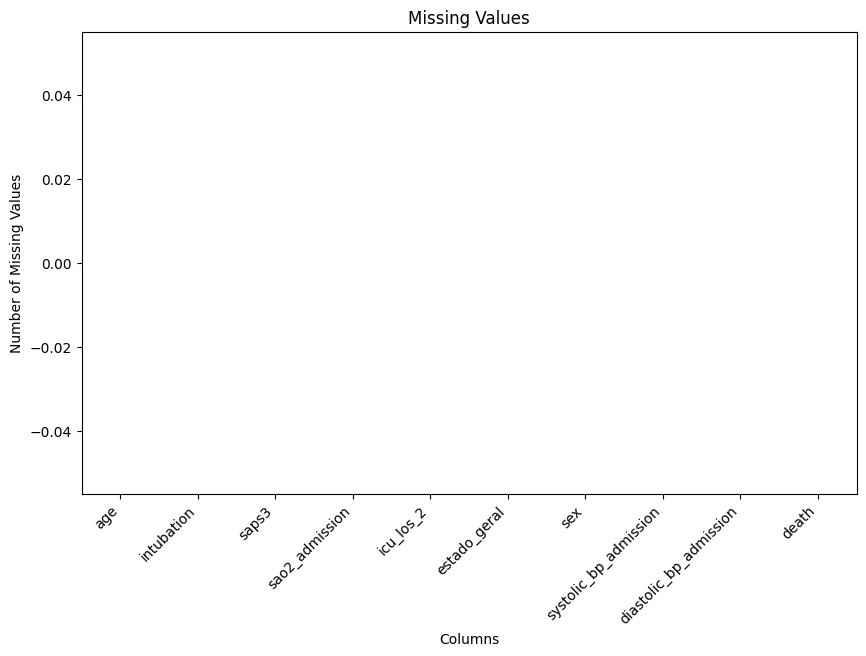

In [274]:
# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

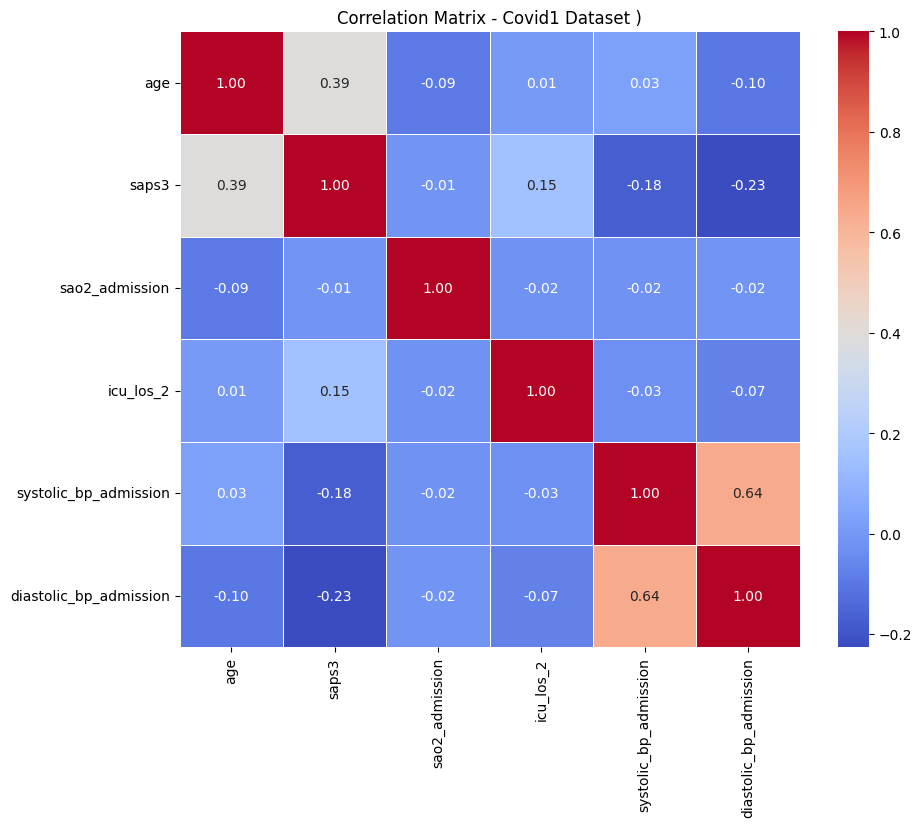

In [351]:
#Drop categorical variables
Covid2 = Covid1.drop(['sex', 'intubation', 'estado_geral', 'death'], axis=1)

#Create a correlation matrix
correlation_matrix = Covid2.corr()

# Visualize the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Covid1 Dataset )')
plt.show()

Here we will check the encoding of our categorical variables.

In [275]:
# Display the data types
print(Covid1.dtypes)

age                       float64
intubation                 object
saps3                       int64
sao2_admission              int64
icu_los_2                   int64
estado_geral               object
sex                        object
systolic_bp_admission       int64
diastolic_bp_admission      int64
death                      object
dtype: object


In [276]:
# Assuming 'df' is your DataFrame
categorical_columns = Covid1.select_dtypes(include=['object']).columns

for column in categorical_columns:
    class_counts = Covid1[column].value_counts()
    print(f"Counts for variable '{column}':\n{class_counts}\n")

Counts for variable 'intubation':
sim    1011
nao     297
Name: intubation, dtype: int64

Counts for variable 'estado_geral':
REG    551
BEG    493
MEG    264
Name: estado_geral, dtype: int64

Counts for variable 'sex':
masculino    767
feminino     541
Name: sex, dtype: int64

Counts for variable 'death':
nao    847
sim    461
Name: death, dtype: int64



Here we need to change the name in the categorical variables for better understanding

In [277]:
# Replace values in the 'death' column
Covid1['death'] = Covid1['death'].replace({'nao': 'No', 'sim': 'Yes'})
Covid1['sex'] = Covid1['sex'].replace({'masculino': 'Male', 'feminino': 'Female'})
Covid1['intubation'] = Covid1['intubation'].replace({'nao': 'No', 'sim': 'Yes'})
Covid1['estado_geral'] = Covid1['estado_geral'].replace({'BEG': 'Good', 'REG': 'Regular', 'MEG': 'Bad'})

In [278]:
# Assuming 'df' is your DataFrame
categorical_columns = Covid1.select_dtypes(include=['object']).columns

for column in categorical_columns:
    class_counts = Covid1[column].value_counts()
    print(f"Counts for variable '{column}':\n{class_counts}\n")

Counts for variable 'intubation':
Yes    1011
No      297
Name: intubation, dtype: int64

Counts for variable 'estado_geral':
Regular    551
Good       493
Bad        264
Name: estado_geral, dtype: int64

Counts for variable 'sex':
Male      767
Female    541
Name: sex, dtype: int64

Counts for variable 'death':
No     847
Yes    461
Name: death, dtype: int64



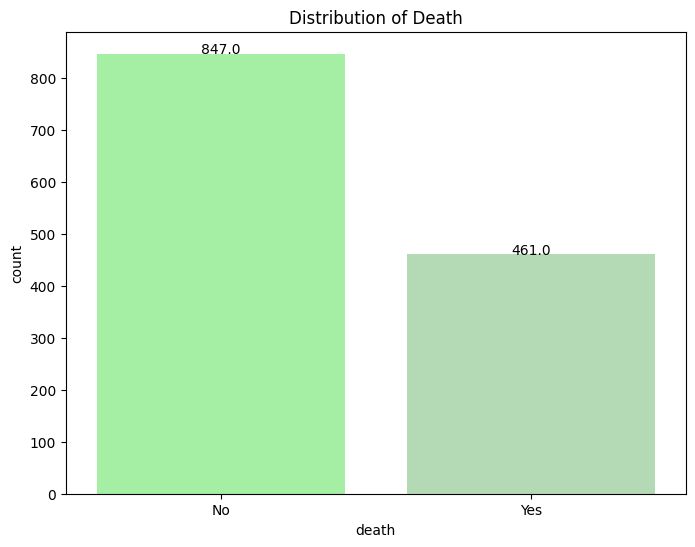

In [279]:
# Explore the distribution of the 'Death' variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='death', data=Covid1, palette = {'No': '#98FB98', 'Yes': '#ACE1AF'})
plt.title('Distribution of Death')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

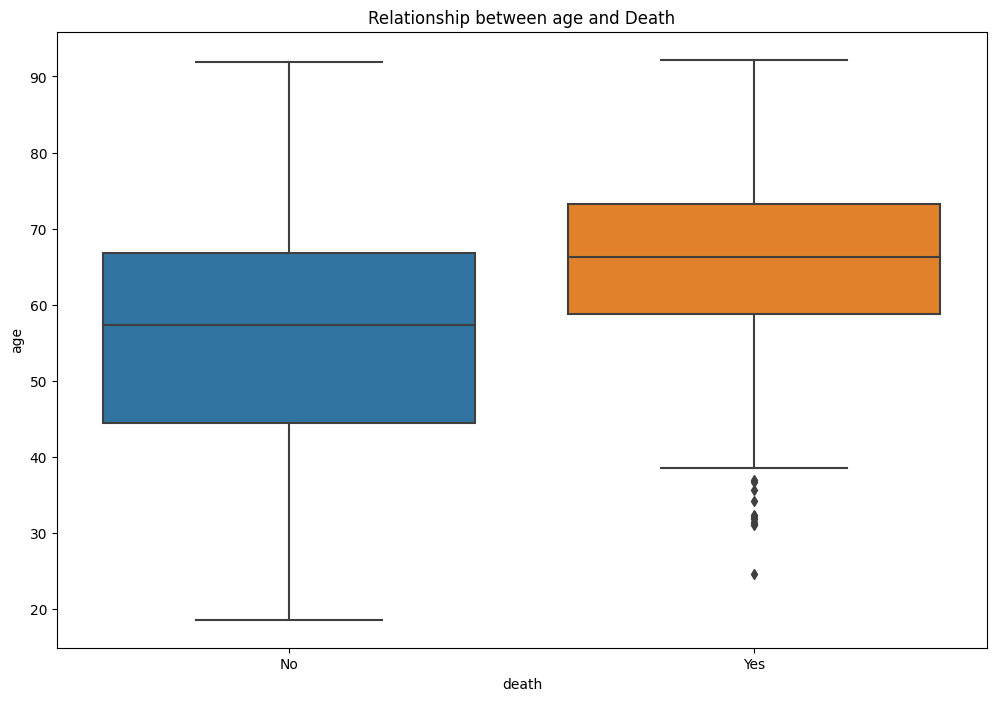

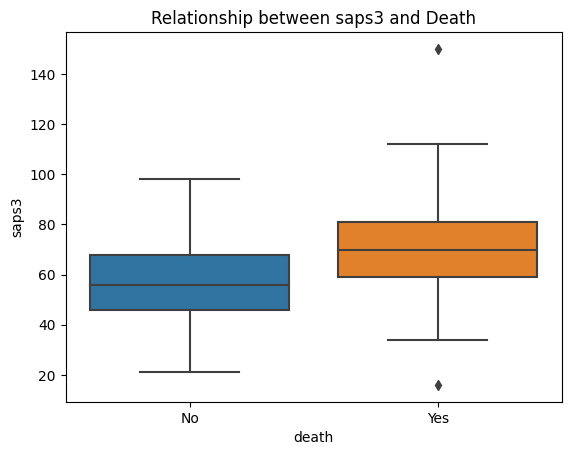

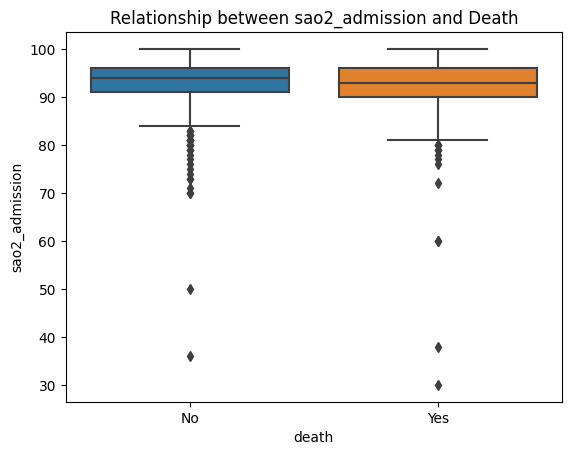

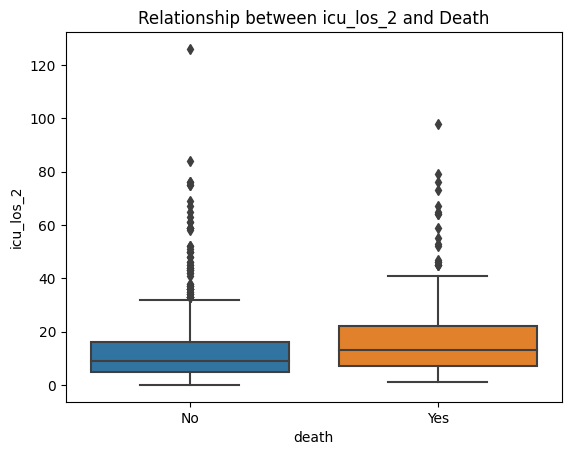

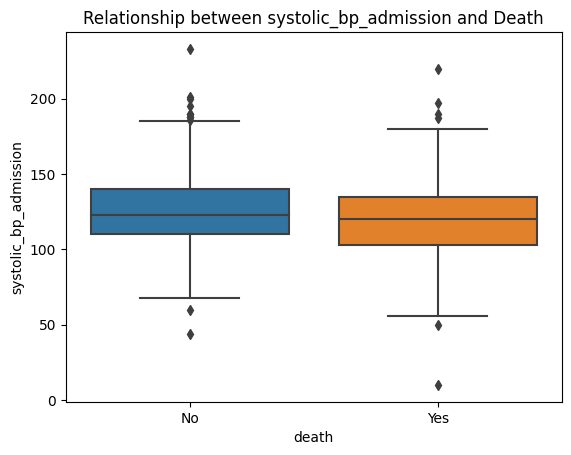

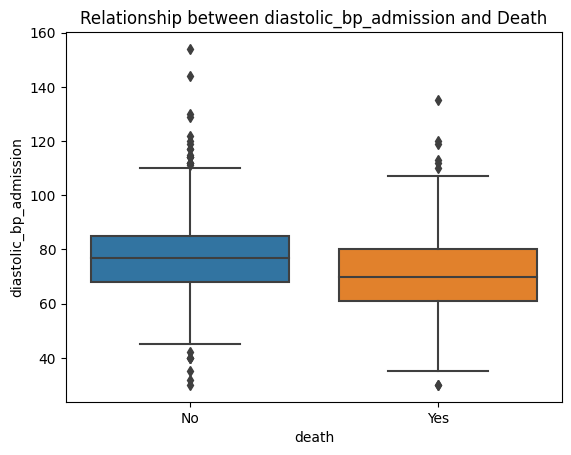

In [280]:
# Explore relationships between predictor variables and 'Death'
# Assuming you have numerical predictor variables
numerical_predictors = Covid1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for predictor in numerical_predictors:
    sns.boxplot(x='death', y=predictor, data=Covid1)
    plt.title(f'Relationship between {predictor} and Death')
    plt.show()

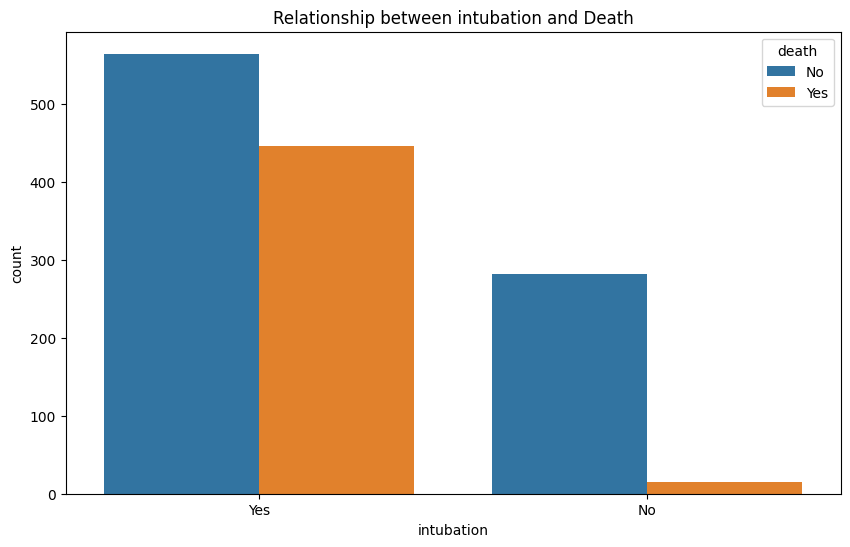

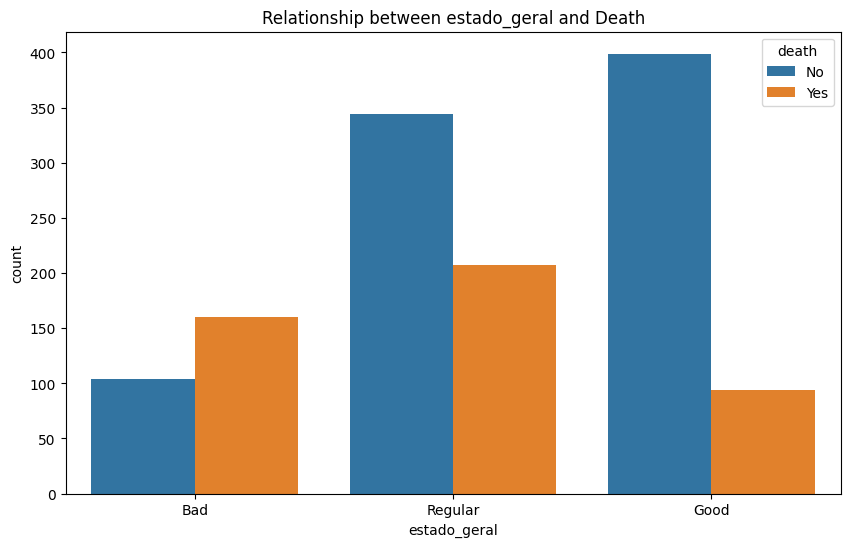

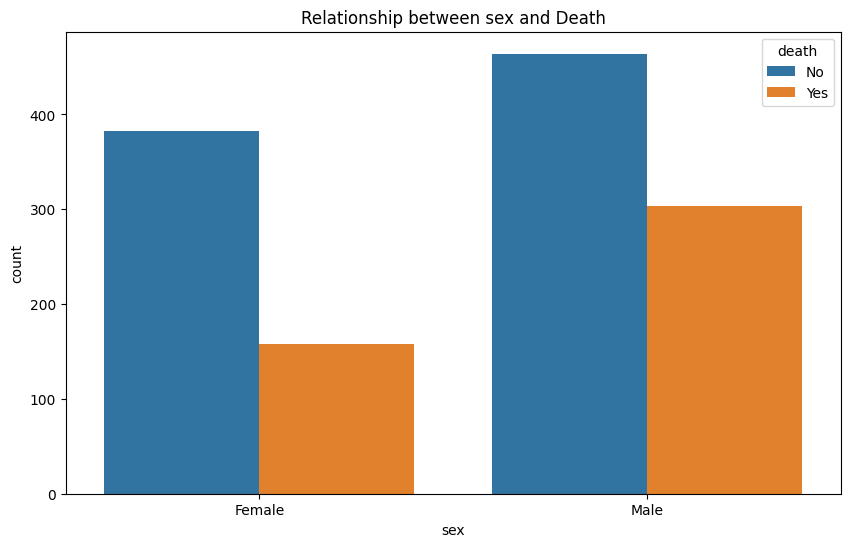

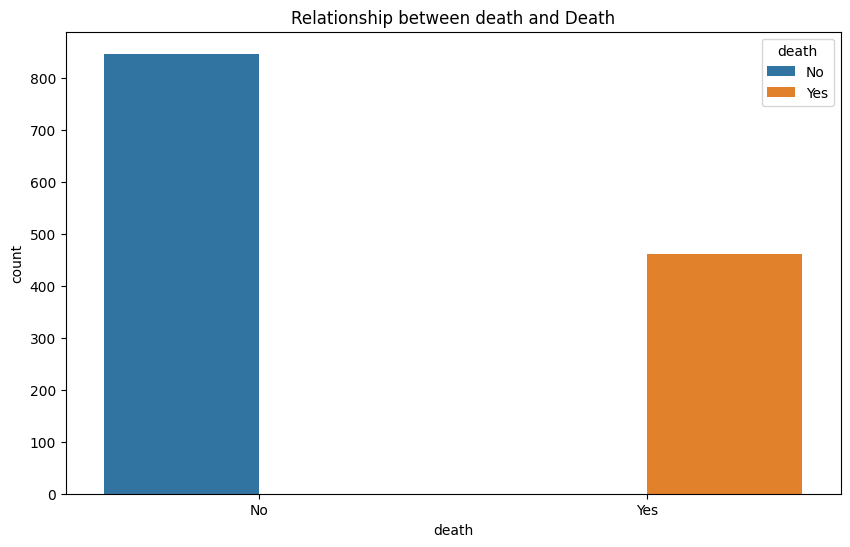

In [281]:
# Assuming you have categorical predictor variables
categorical_predictors = Covid1.select_dtypes(include=['object']).columns

for predictor in categorical_predictors:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=predictor, hue='death', data=Covid1)
    plt.title(f'Relationship between {predictor} and Death')
    plt.show()

Now, we will encode our Categorical variables to could apply the imputation technique.

In [282]:
print(Covid1.dtypes)

age                       float64
intubation                 object
saps3                       int64
sao2_admission              int64
icu_los_2                   int64
estado_geral               object
sex                        object
systolic_bp_admission       int64
diastolic_bp_admission      int64
death                      object
dtype: object


In [283]:
# Encoding variable Mortgage
label_encoder = LabelEncoder()
Covid1['intubation'] = label_encoder.fit_transform(Covid1['intubation'])

In [284]:
# Checking Class Distribution
class_distribution = Covid1['intubation'].value_counts()

print(class_distribution)

1    1011
0     297
Name: intubation, dtype: int64


In [285]:
# Encoding variable Mortgage
label_encoder = LabelEncoder()
Covid1['sex'] = label_encoder.fit_transform(Covid1['sex'])

In [286]:
# Checking Class Distribution
class_distribution = Covid1['sex'].value_counts()

print(class_distribution)

1    767
0    541
Name: sex, dtype: int64


In [287]:
# Encoding variable Mortgage
label_encoder = LabelEncoder()
Covid1['estado_geral'] = label_encoder.fit_transform(Covid1['estado_geral'])

In [288]:
# Checking Class Distribution
class_distribution = Covid1['estado_geral'].value_counts()

print(class_distribution)

2    551
1    493
0    264
Name: estado_geral, dtype: int64


In [289]:
# Encoding variable Mortgage
label_encoder = LabelEncoder()
Covid1['death'] = label_encoder.fit_transform(Covid1['death'])

In [304]:
# Checking Class Distribution
class_distribution = Covid1['death'].value_counts()

print(class_distribution)

0    847
1    461
Name: death, dtype: int64


Before construct the different models we split our set in training and testing

In [316]:
#  We specify our features (X) and target variable (y)
X = Covid1.drop('death', axis=1)
y = Covid1['death']

# Perform the 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [317]:
print("Number of rows in Training Data:", X_train.shape[0])
print("Number of rows in Testing Data:", X_test.shape[0])

Number of rows in Training Data: 1046
Number of rows in Testing Data: 262


# **Logistic Regression Model**

Optimization terminated successfully.
         Current function value: 0.509213
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  death   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1037
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.2176
Time:                        21:38:01   Log-Likelihood:                -532.64
converged:                       True   LL-Null:                       -680.81
Covariance Type:            nonrobust   LLR p-value:                 2.471e-59
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                        0.0459      0.006      7.434      0.000       0.034      

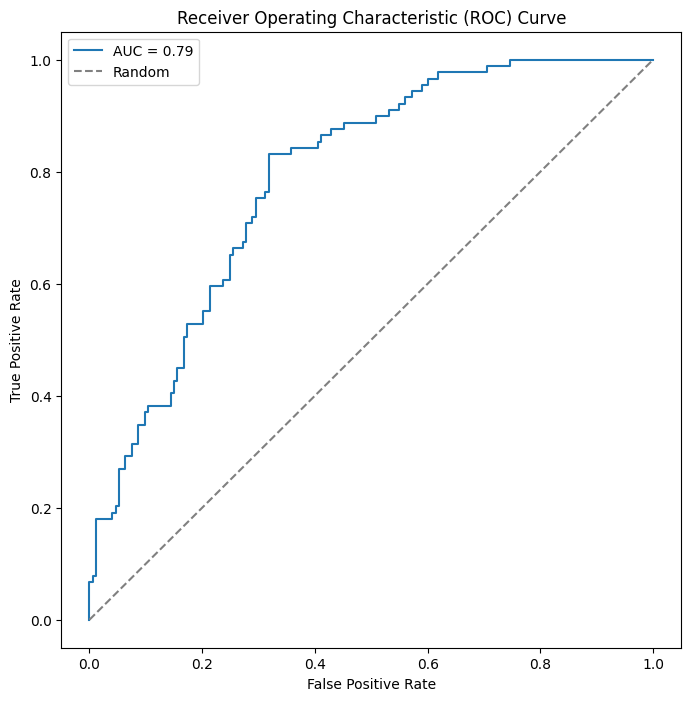

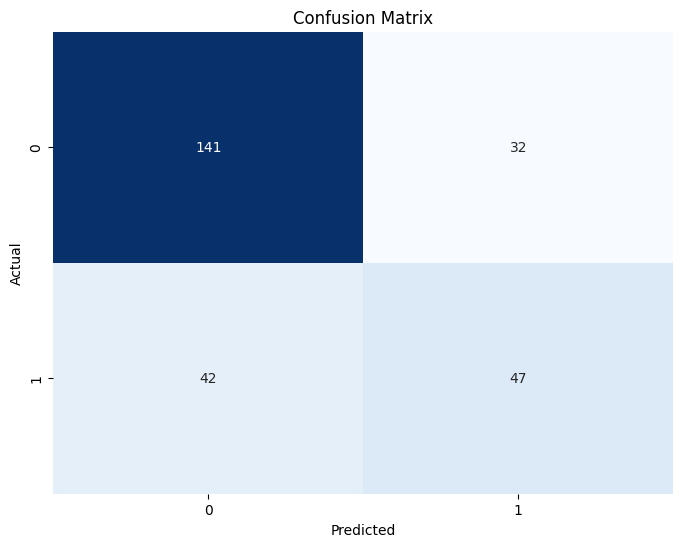

In [330]:
# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate confusion matrix
threshold = 0.5  # You can adjust the threshold based on your preference
y_pred = (y_pred_prob > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now, we will do a second Logistic Regression Model without including the variables that does not show statistically significance.

In [333]:
#  We specify our features (X) and target variable (y)
X = Covid1.drop(['death','sex','intubation'], axis=1)
y = Covid1['death']

# Perform the 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Optimization terminated successfully.
         Current function value: 0.548044
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  death   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.1580
Time:                        21:41:36   Log-Likelihood:                -573.25
converged:                       True   LL-Null:                       -680.81
Covariance Type:            nonrobust   LLR p-value:                 1.148e-43
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                        0.0372      0.006      6.500      0.000       0.026      

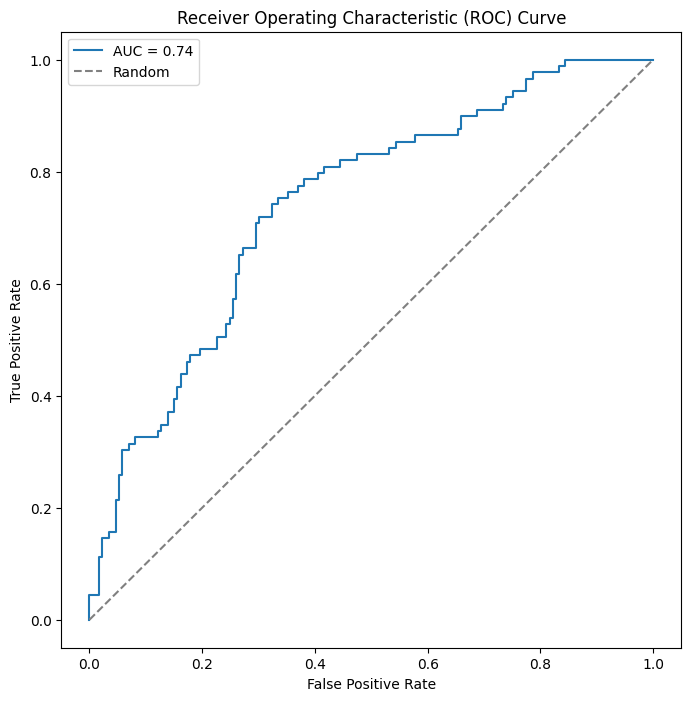

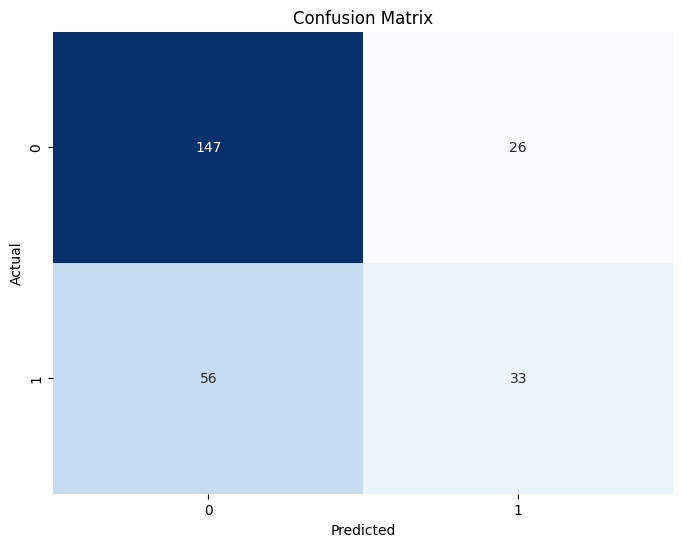

In [334]:
# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate confusion matrix
threshold = 0.5  # You can adjust the threshold based on your preference
y_pred = (y_pred_prob > threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now, in order to fit KNN models and Neural Network Models we need to standarize the data.

In [309]:
# Standardize the data (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **KNN Model**

In [310]:
# Define a list of different numbers of neighbors to try
k_values = [1, 15, 21, 31,35, 37,100]

# Iterate over different k values and train a KNN classifier for each
for k in k_values:
    # Create KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test_scaled)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate the sensitivity (recall) of the model
    sensitivity = recall_score(y_test, y_pred)


    # Calculate the predicted probabilities for class 1 (positive class)
    y_pred_proba = knn_classifier.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Print the results
    print(f"Number of Neighbors (k): {k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("="*30)

Number of Neighbors (k): 1
Accuracy: 0.6527
Sensitivity (Recall): 0.4382
AUC-ROC: 0.6006
Number of Neighbors (k): 15
Accuracy: 0.7061
Sensitivity (Recall): 0.4157
AUC-ROC: 0.7896
Number of Neighbors (k): 21
Accuracy: 0.7290
Sensitivity (Recall): 0.4157
AUC-ROC: 0.8027
Number of Neighbors (k): 31
Accuracy: 0.7405
Sensitivity (Recall): 0.4270
AUC-ROC: 0.8183
Number of Neighbors (k): 35
Accuracy: 0.7557
Sensitivity (Recall): 0.4719
AUC-ROC: 0.8192
Number of Neighbors (k): 37
Accuracy: 0.7519
Sensitivity (Recall): 0.4719
AUC-ROC: 0.8217
Number of Neighbors (k): 100
Accuracy: 0.7519
Sensitivity (Recall): 0.3933
AUC-ROC: 0.8154


Number of Neighbors (k): 35
Accuracy: 0.7557
Sensitivity (Recall): 0.4719
AUC-ROC: 0.8192
Confusion Matrix:
[[156  17]
 [ 47  42]]


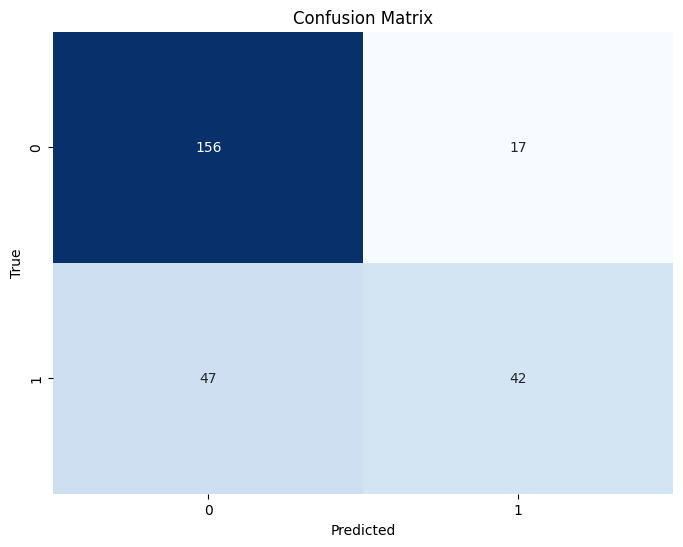

In [311]:
# Number of neighbors for the KNN classifier
k = 35

# Create KNN classifier with 17 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy1 = accuracy_score(y_test, y_pred)

# Evaluate the sensitivity (recall) of the model
sensitivity = recall_score(y_test, y_pred)

# Calculate the predicted probabilities for class 1 (positive class)
y_pred_proba = knn_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Number of Neighbors (k): {k}")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

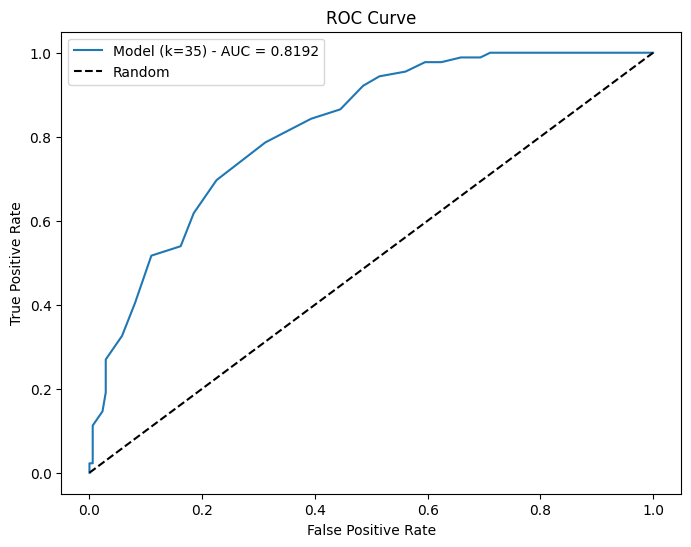

In [312]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model (k={k}) - AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Neural Network Model**

In [344]:
#  We specify our features (X) and target variable (y)
X = Covid1.drop('death', axis=1)
y = Covid1['death']

# Perform the 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [345]:
# Standardize the data (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [346]:
# Define a list of different numbers of hidden nodes to try
hidden_nodes_list = [16,32, 64, 128,256]

# Iterate over different numbers of hidden nodes and train a neural network for each
for hidden_nodes in hidden_nodes_list:
    # Create a sequential model
    model = Sequential()

    # Add the input layer with the number of features in your dataset
    model.add(Dense(hidden_nodes, input_dim=X_train.shape[1], activation='relu'))

    # Add the output layer with the appropriate activation function (e.g., 'sigmoid' for binary classification)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the testing data
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate the AUC score
    roc_auc = auc(fpr, tpr)

    # Print the results
    print(f"Number of Hidden Nodes: {hidden_nodes}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(f"AUC: {roc_auc:.4f}")
    print(cm)
    print("="*30)

9/9 [==============================] - 0s 2ms/step
Number of Hidden Nodes: 16
Accuracy: 0.7061
Confusion Matrix:
AUC: 0.7401
[[142  31]
 [ 46  43]]
9/9 [==============================] - 0s 2ms/step
Number of Hidden Nodes: 32
Accuracy: 0.7137
Confusion Matrix:
AUC: 0.7401
[[143  30]
 [ 45  44]]
9/9 [==============================] - 0s 3ms/step
Number of Hidden Nodes: 64
Accuracy: 0.7214
Confusion Matrix:
AUC: 0.7401
[[141  32]
 [ 41  48]]
9/9 [==============================] - 0s 3ms/step
Number of Hidden Nodes: 128
Accuracy: 0.7290
Confusion Matrix:
AUC: 0.7401
[[143  30]
 [ 41  48]]
9/9 [==============================] - 0s 2ms/step
Number of Hidden Nodes: 256
Accuracy: 0.7443
Confusion Matrix:
AUC: 0.7401
[[149  24]
 [ 43  46]]


In [347]:
# Number of hidden nodes for the neural network
hidden_nodes = 256

# Create a sequential model with 64 hidden nodes
model = Sequential()
model.add(Dense(hidden_nodes, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model on the testing data
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Number of Hidden Nodes: {hidden_nodes}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(f"AUC: {roc_auc:.4f}")
print(cm)
print("="*30)

9/9 [==============================] - 0s 2ms/step
Number of Hidden Nodes: 256
Accuracy: 0.7405
Confusion Matrix:
AUC: 0.8092
[[147  26]
 [ 42  47]]


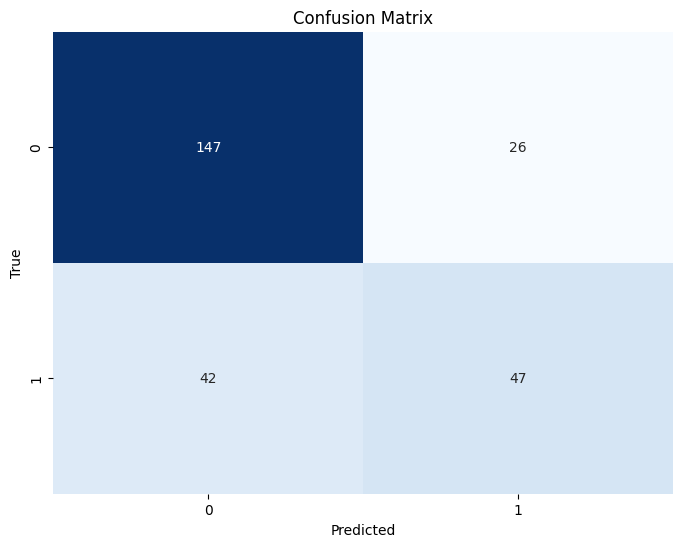

In [348]:
# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# **Random Forest Model**

In [335]:
#  We specify our features (X) and target variable (y)
X = Covid1.drop('death', axis=1)
y = Covid1['death']

# Perform the 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

AUC Score: 0.6862
Accuracy: 0.7405


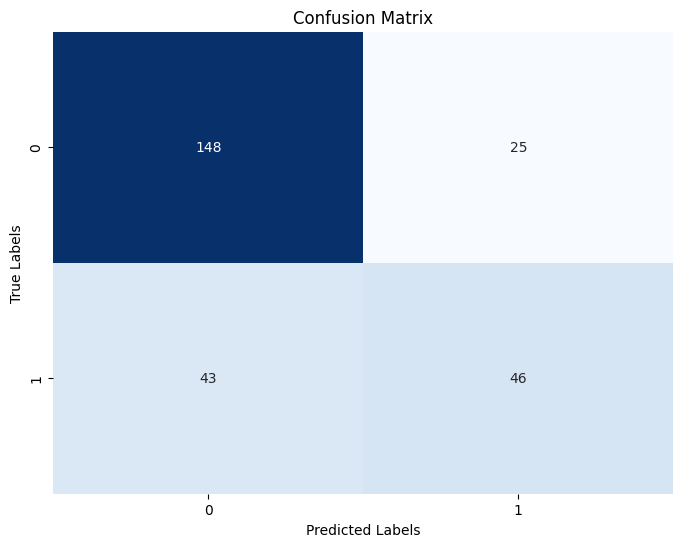

In [338]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

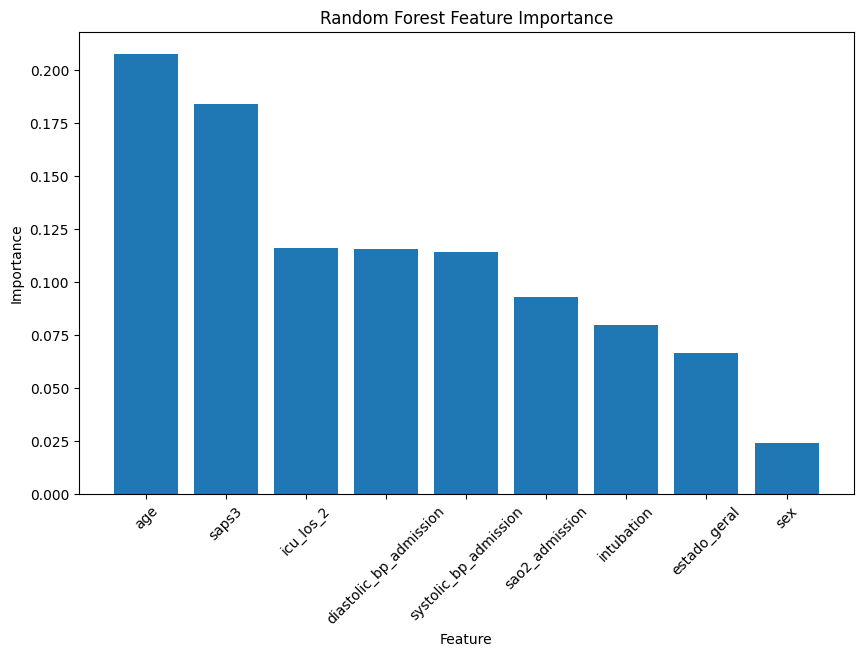

In [339]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features based on importance
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()